### Universidad de los Andes
##### Juan Camilo Angarita

# Exercise 18

## Analyze class homeworks


In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer

# Exercise 18.1

Analyze the writing patterns of each student

In [5]:
data.isna().sum()

Sexo     0
T1       1
T2      12
T3      12
T4       6
T5       7
T6      13
dtype: int64

In [6]:
data=data.fillna(' ', inplace=False)

In [7]:
pd.pivot_table(data, index='Sexo', aggfunc='count').loc[:,'T1']

Sexo
H    34
M     8
Name: T1, dtype: int64

In [8]:
data.isna().sum()

Sexo    0
T1      0
T2      0
T3      0
T4      0
T5      0
T6      0
dtype: int64

In [10]:
data["agreggate"] = data["T1"]+data["T2"]+data["T3"]+data["T4"]+data["T5"]+data["T6"]#

In [11]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,agreggate
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...


In [12]:
X = data.agreggate

In [13]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [14]:
temp=X_dtm.todense()

In [15]:
vect.vocabulary_

{'un': 5615,
 'científico': 912,
 'de': 1527,
 'datos': 1524,
 'ingeniero': 3085,
 'tienen': 5492,
 'ciertas': 916,
 'habilidades': 2808,
 'en': 2068,
 'común': 1145,
 'por': 4232,
 'ejemplo': 2004,
 'poseen': 4243,
 'programación': 4460,
 'sin': 5152,
 'embargo': 2038,
 'las': 3287,
 'están': 2371,
 'mucho': 3678,
 'más': 3713,
 'allá': 306,
 'hacer': 2826,
 'que': 4576,
 'cree': 1427,
 'flujo': 2609,
 'está': 2370,
 'el': 2010,
 'extremo': 2535,
 'alejado': 280,
 'sus': 5355,
 'pero': 4131,
 'es': 2226,
 'pan': 3995,
 'cada': 765,
 'día': 1956,
 'general': 2720,
 'existen': 2450,
 'varias': 5731,
 'diferencias': 1805,
 'entre': 2179,
 'puede': 4548,
 'organizar': 3949,
 'almacenar': 310,
 'gran': 2776,
 'cantidad': 807,
 'además': 175,
 'realizar': 4671,
 'análisis': 390,
 'descriptivos': 1693,
 'predictivos': 4313,
 'prescriptivos': 4348,
 'con': 1147,
 'fin': 2587,
 'resolver': 4871,
 'una': 5616,
 'necesidad': 3750,
 'negocio': 3762,
 'generar': 2733,
 'valor': 5708,
 'la': 3275,


In [16]:
data['length'] = data['agreggate'].apply(len)
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,agreggate,length
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...,11576
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...,8514
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...,11102
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...,9587
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...,10241


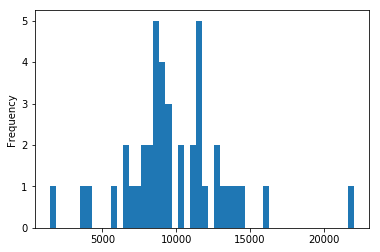

In [17]:
data['length'].plot(bins=50,kind = 'hist')

In [18]:
df=pd.DataFrame.from_dict(vect.vocabulary_, orient='index',columns=['Number'])
df.sort_values(by='Number', ascending=False)

,Number
útiles,5891
útil,5890
únicos,5889
único,5888
únicamente,5887
única,5886
últimos,5885
último,5884
últimas,5883
última,5882


Es interesante que el top de palabras en los textos están muy relacionadas en los primeros lugares como útiles y útil o únicos, único, únicamente y única

In [19]:
data.groupby('Sexo').describe()

length                                                                \
      count          mean          std     min      25%     50%       75%   
Sexo                                                                        
H      34.0   9797.470588  3780.833524  1436.0  7943.75  9194.5  11567.75   
M       8.0  10157.125000  2248.111299  6702.0  8918.25  9479.0  12002.50   

               
          max  
Sexo           
H     22078.0  
M     13314.0

Los escritos realizados por mujeres son un poco más largos y con una desviación estandar menor lo que quiere decir que los datos están más condensados

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [20]:
pip install -e git+https://github.com/orsinium/textdistance.git


The following command must be run outside of the IPython shell:

    $ pip install -e git+https://github.com/orsinium/textdistance.git

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [21]:
import textdistance
textdistance.hamming.similarity('test', 'text')


3

In [22]:
import textdistance
hamming = textdistance.Hamming(external=False)
hamming('text', 'testit')

3

In [23]:
X.shape[0]

42

In [26]:
dist = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        dist[i,j] = textdistance.hamming.distance(X.iloc[i], X.iloc[j])

In [27]:
dist

array([[    0., 10961., 10749., ..., 12527., 10915., 10936.],
       [10961.,     0., 10460., ..., 12688.,  8766.,  7893.],
       [10749., 10460.,     0., ..., 12503., 10431., 10477.],
       ...,
       [12527., 12688., 12503., ...,     0., 12631., 12674.],
       [10915.,  8766., 10431., ..., 12631.,     0.,  8760.],
       [10936.,  7893., 10477., ..., 12674.,  8760.,     0.]])

In [28]:
df_dist = pd.DataFrame(dist)

# Exercise 18.3

Create a classifier to predict the sex of each student



In [30]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_dtm, data['Sexo'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_jobs=-1,n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))


0.9285714285714286


In [34]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)

X_res, y_res = ada.fit_resample(X_train, y_train)
clf.fit(X_res, y_res)

predicted_ADASYN=clf.predict(X_test)


In [36]:
predicted_ADASYN

array(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H'], dtype=object)

In [37]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predicted_ADASYN))

0.9285714285714286
